# House Price Prediction By usng LinearRegression

In [129]:
import pandas as pd
import numpy as np 
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [175]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')




In [133]:
df.head()


,Id,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,1,1710,1,0,2,1,3,208500
1,2,1262,0,1,2,0,3,181500
2,3,1786,1,0,2,1,3,223500
3,4,1717,1,0,1,0,3,140000
4,5,2198,1,0,2,1,4,250000



# Data preprocessing

### train Dataset

In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   BsmtFullBath  1460 non-null   int64
 3   BsmtHalfBath  1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   HalfBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   SalePrice     1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


Notice!!  as we see from the description above there is no any missing value in the train data.so we will use the data to train our model 

### Test Dataset

In [157]:
test_df.isnull().sum()


Id              0
GrLivArea       0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

In [119]:
test_df[test_df.isnull().any(axis=1)]


,Id,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
660,2121,896,NaN,NaN,1,0,2
728,2189,3820,NaN,NaN,3,1,5


In [159]:
test_df = test_df.dropna()

In [93]:
test_df.isnull().sum()

GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

# Split the Datset  into Training and Test sets


In [181]:
# applying log transformation 

x = df.drop(['SalePrice'], axis = 1)
y = np.log1p(df['SalePrice'])

# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model


In [183]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [185]:

# Predict and evaluate
y_pred = model.predict(X_test)


# Convert predictions back to original scale (house prices)



In [187]:

# Convert predictions back to original scale (house prices)
y_pred_actual = np.expm1(y_pred)     # expm1 = exp(x) - 1 (inverse of log1p)
y_test_actual = np.expm1(y_test)     # Also convert the actual values



In [189]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.06


# visualization

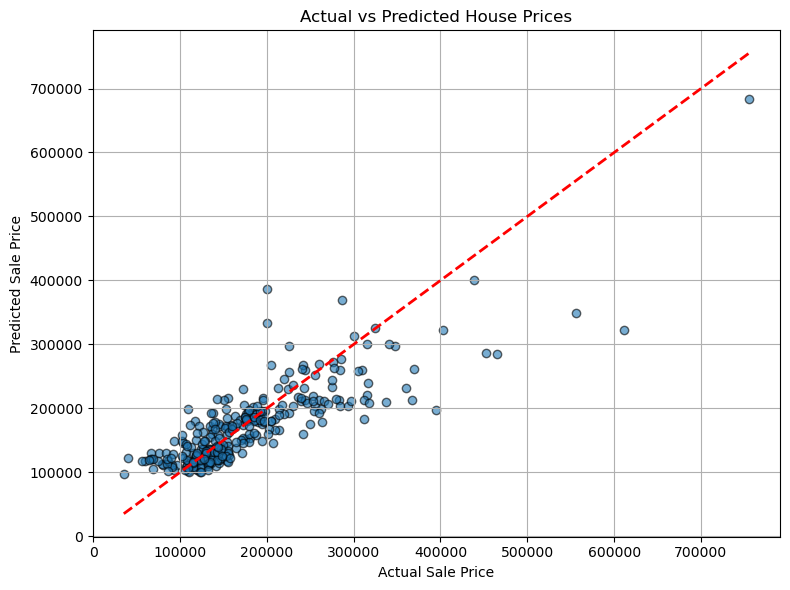

In [208]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.6, edgecolors='k')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)  # Ideal line
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


# using the model for test Dataset

In [161]:



predicted_prices = model.predict(test_df)

test_df['PredictedPrice'] = np.expm1(predicted_prices)
test_df


,Id,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,PredictedPrice
0,1461,896,0.0,0.0,1,0,2,110218.185712
1,1462,1329,0.0,0.0,1,1,3,129295.838377
2,1463,1629,0.0,0.0,2,1,3,183341.205391
3,1464,1604,0.0,0.0,2,1,3,181493.910727
4,1465,1280,0.0,0.0,2,0,2,161684.270504
...,...,...,...,...,...,...,...,...
1454,2915,1092,0.0,0.0,1,1,3,115116.643160
1455,2916,1092,0.0,0.0,1,1,3,115115.035894
1456,2917,1224,1.0,0.0,1,0,4,121395.125503
1457,2918,970,0.0,1.0,1,0,3,110333.885594
